# Explatory data analysis of blockbuter movies

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Reading in the data

In [155]:
df = pd.read_csv('data/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [156]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

We can see that most of missing values fall into the homepage and tagline columns, which is data unlikely to impact our analysis of the data.
For the few other values we can inspect and handle those further into the analysis.

In [157]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [158]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [159]:
df['original_language'].unique()
print('Unique values for each column: \n')
for col in df.columns.values:
    print(col, len(df[col].unique()))

Unique values for each column: 

budget 436
genres 1175
homepage 1692
id 4803
keywords 4222
original_language 37
original_title 4801
overview 4801
popularity 4802
production_companies 3697
production_countries 469
release_date 3281
revenue 3297
runtime 157
spoken_languages 544
status 3
tagline 3945
title 4800
vote_average 71
vote_count 1609


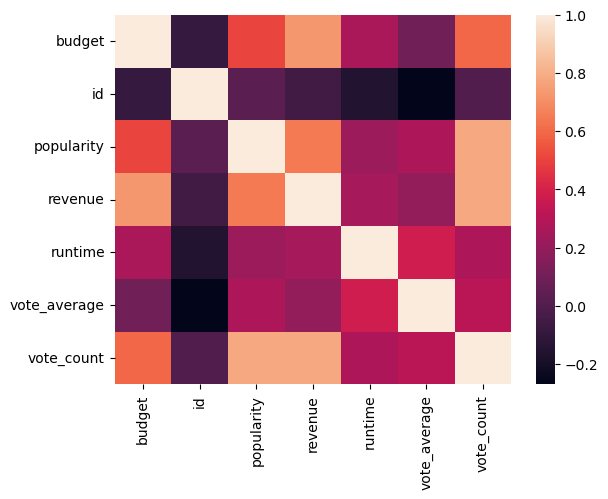

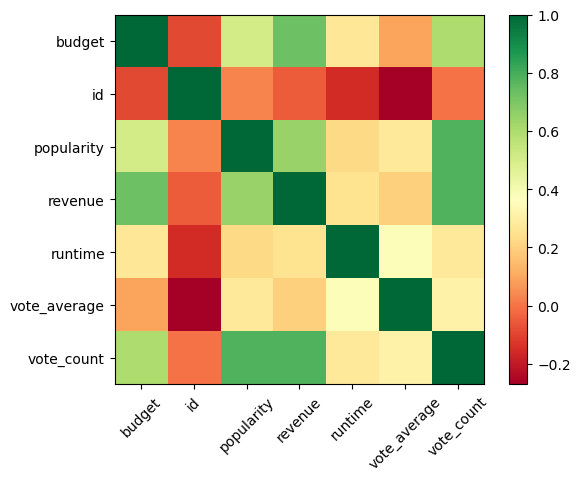

In [160]:
df_numeric_featues = df.select_dtypes(include=['int64', 'float64'])
corr = df_numeric_featues.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

fig, ax = plt.subplots()
im = ax.imshow(corr, cmap='RdYlGn')
ax.set_yticks(range(len(corr.columns.values)),corr.columns.values)
ax.set_xticks(range(len(corr.columns.values)),corr.columns.values, rotation=45)
ax.figure.colorbar(im)
plt.show()


### Visualise the relationship between different values

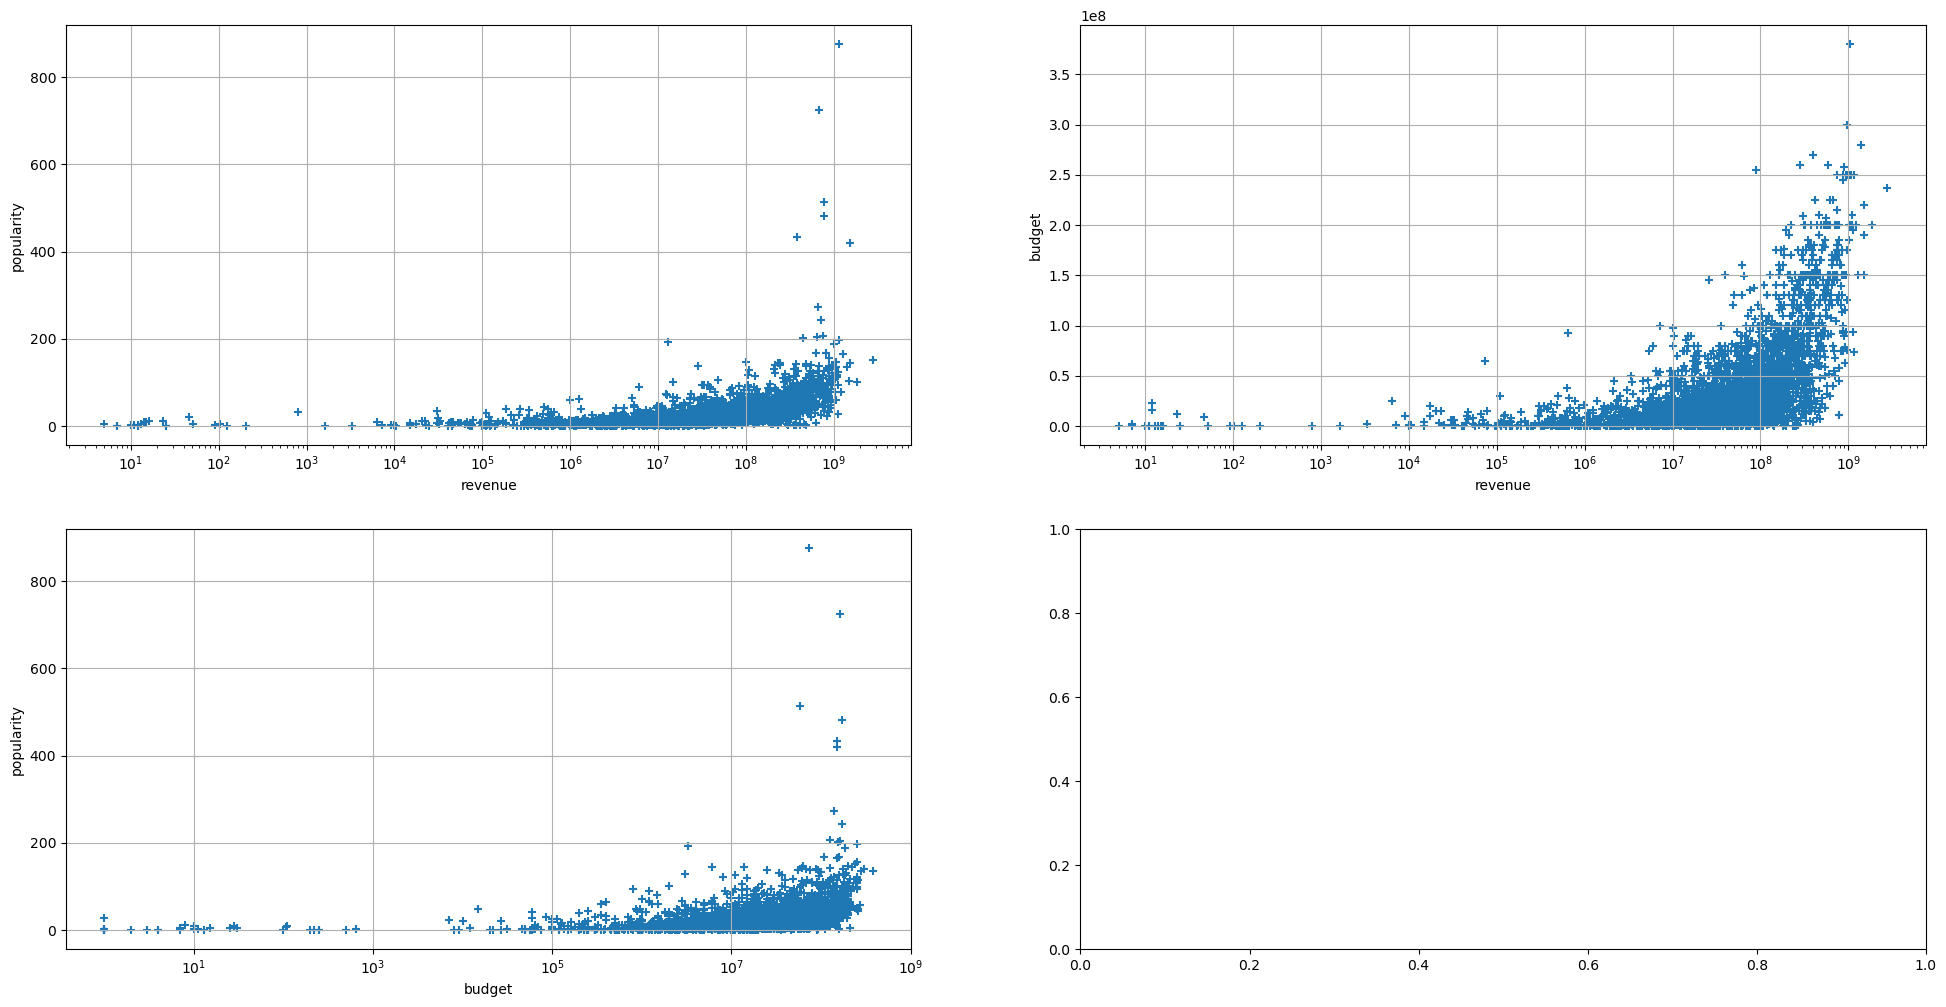

In [195]:


def scatter_pairs(label_pairs,df):

    num_pairs = len(label_pairs)
    fig, axes = plt.subplots(nrows = int((num_pairs/2)+1), ncols=min(2,num_pairs), figsize=(24,6*int((num_pairs/2)+1)))
    axes = axes.flatten()

    for i, pair in enumerate(label_pairs):
        
        ax = axes[i]
        x = df[pair[0]]
        y = df[pair[1]]

        ax.scatter(x,y, marker='+')
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])
        ax.set_xscale('log')
        # ax.set_yscale('log')
        ax.grid()


scatter_pairs([['revenue', 'popularity'], ['revenue', 'budget'], ['budget', 'popularity']],df)

There is a lot of values here as it is a large dataset, so it is best to view the data in bands as bar charts

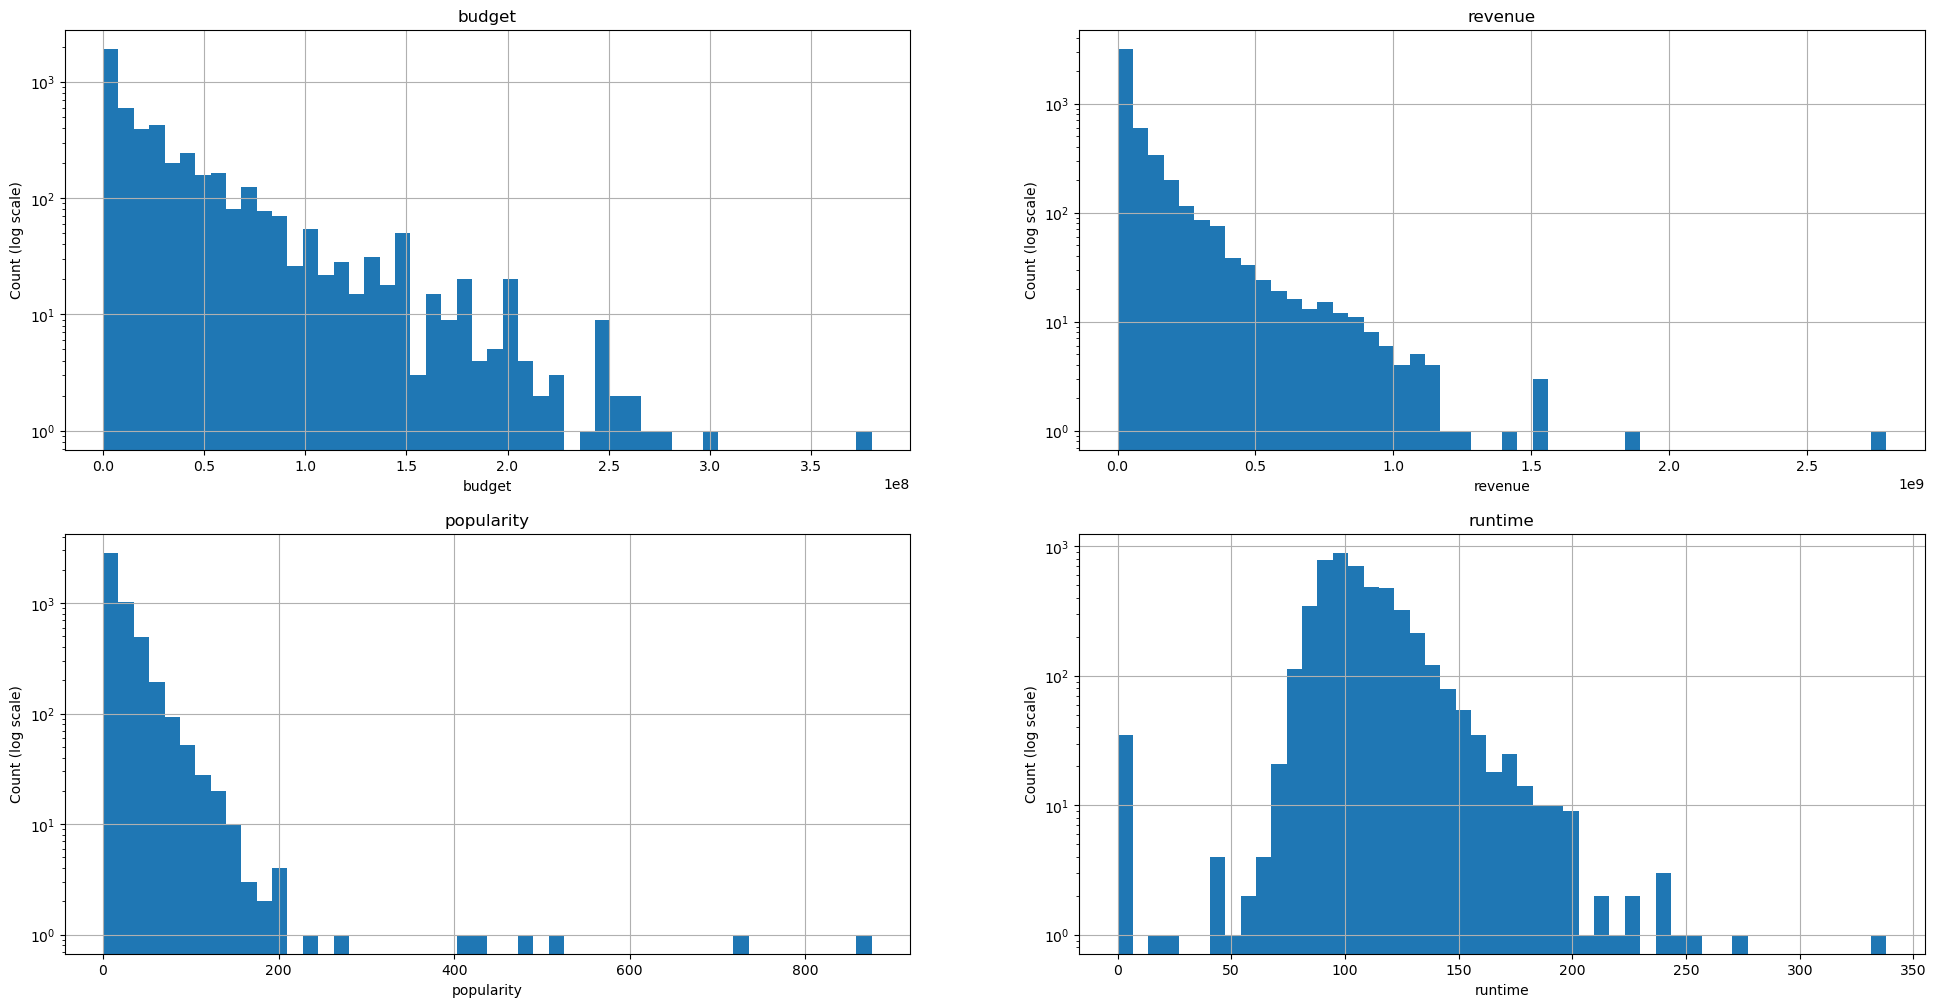

In [191]:

def histograms(categories,df):

    num_pairs = len(categories)
    fig, axes = plt.subplots(nrows = int((num_pairs/2)), ncols=min(2,num_pairs), figsize=(24,4*int((num_pairs/2)+1)))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        
        ax = axes[i]

        ax.hist(df[category], bins=50)
        # ax.scatter(x,y, marker='+')
        ax.set_xlabel(category)
        ax.set_ylabel('Count (log scale)')
        ax.grid()
        ax.set_yscale('log')
        ax.set_title(category)

# plt.figure(figsize=(12,7))
# plt.hist(df['budget'],bins= 50)
# plt.title("Distribution of the budget")
# plt.xlabel('Money')
# plt.ylabel('# of movies')
# plt.yscale("log")
# plt.show()

histograms(['budget', 'revenue', 'popularity', 'runtime'],df)

## We need to handle the columns containing JSON values

In [162]:
df['keywords'].iloc[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [163]:
js = json.loads(df['keywords'].iloc[0])
js



[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

We are going to go through each json column, convert the column into an array of ids and simultaneously create a seperate datafram matching the id to the name of the value.

In [164]:
df.iloc[0]
for i in ['keywords', 'genres', 'production_companies', 'production_countries', 'spoken_languages']:
    print(df[i].iloc[0])

[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]
[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]
[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune En

In [170]:
def extract_id(x, dicts, column):
    js = json.loads(x)
    new_ids = []

    if column not in dicts:
        dicts[column] = {}

    if len(js):
        keys = list(js[0].keys())
        # print(list(keys))
        keys.remove('name')
        id_key = keys[0]

        for i in range(len(js)):
            if js[i][id_key] in dicts[column]:
                new_ids.append(js[i][id_key])
            else:
                dicts[column][js[i][id_key]] = js[i]['name']
                new_ids.append(js[i][id_key])

        return set(new_ids)

    return []

    

In [171]:
json_columns = ['keywords', 'genres', 'production_companies', 'production_countries', 'spoken_languages']

key_df = {}

for column in json_columns:

    new_col = column+'_ids'

    print(column)
    df[new_col] = df[column].apply(lambda x: extract_id(x, key_df, column))

keywords
genres
production_companies
production_countries
spoken_languages


In [174]:
df_key = pd.DataFrame(key_df)
df_key.to_csv('key_id_pairs.csv')

In [182]:
print('Numver of unique values: \n')
for key in key_df.keys():
    print(key, len(key_df[key]))

Numver of unique values: 

keywords 9813
genres 20
production_companies 5047
production_countries 88
spoken_languages 87


## Now use some bar & pie charts to display the information about films with certain genres

In [219]:
def name_from_key(x, column):
    return key_df[column][x]

[12, 14, 16, 18, 27, 28, 35, 36, 37, 53, 80, 99, 878, 9648, 10402, 10749, 10751, 10752, 10769, 10770]
[ 790  424  234 2297  519 1154 1722  197   82 1274  696  110  535  348
  185  894  513  144   34    8]
['Adventure', 'Fantasy', 'Animation', 'Drama', 'Horror', 'Action', 'Comedy', 'History', 'Western', 'Thriller', 'Crime', 'Documentary', 'Science Fiction', 'Mystery', 'Music', 'Romance', 'Family', 'War', 'Foreign', 'TV Movie']


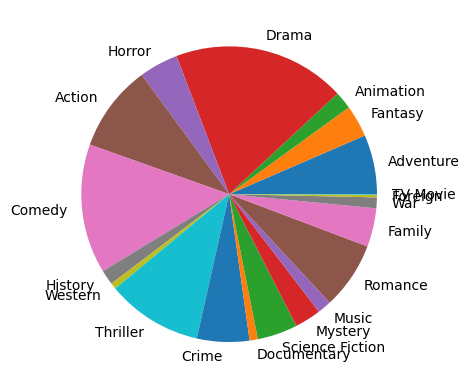

In [222]:
df_genre = df.explode('genres_ids')
group_genre_df = df_genre.groupby('genres_ids')['genres_ids'].count()
print(list(group_genre_df.keys()))
print(group_genre_df.values)

array = list(group_genre_df.keys())
x = [name_from_key(x, 'genres') for x in array]

print(x)
         

plt.pie(group_genre_df.values, labels=x)
plt.show()

